<a href="https://colab.research.google.com/github/shubhamx64/SBHacks2019/blob/master/Sakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

In [0]:
image1 = ["sky", "hill", "cloud", "house", "grass"]
image2 = ["sky", "cloud", "grass", "human"]
image3 = ["car"]
image4 = ["sky", "grass"]
image5 = ["sky", "cloud", "grass"]
image6 = ["car", "road", "truck"]
image7 = ["truck", "road", "sky"]
image8 = ["car", "road","hill"]
image9 = ["truck", "highway"]

listofObjectsFromImages = [ image1, image2, image3, image4, image5, image6, image7, image8, image9 ]
setOfObjectsSeen = set()

G=nx.Graph()

In [0]:
for listofObjects in listofObjectsFromImages:
  for obj in listofObjects:
    if obj not in setOfObjectsSeen:
      setOfObjectsSeen.add(obj)
      G.add_node(obj)

print (setOfObjectsSeen)

set(['road', 'house', 'sky', 'truck', 'hill', 'human', 'car', 'grass', 'cloud', 'highway'])


In [0]:
#Initializing thought chart
for listofObjects in listofObjectsFromImages:
  for node in listofObjects:
    for otherNode in listofObjects:
      if node == otherNode:
        continue
      if G.has_edge(node, otherNode) == False:
        G.add_edge(node, otherNode, weight=1)
        
maxWeight = 0;
for listofObjects in listofObjectsFromImages:
  for node in listofObjects:
    for otherNode in listofObjects:
      if node == otherNode:
        continue
      if G.has_edge(node, otherNode) == False:
        continue
      G[node][otherNode]['weight'] = G[node][otherNode]['weight'] + 1
      if maxWeight < G[node][otherNode]['weight']:
        maxWeight = G[node][otherNode]['weight']
      

Assume that all unique objects have been added to the graph

(-1.1174242262389158,
 1.1174242262389156,
 -1.072177836439361,
 1.0721779556486506)

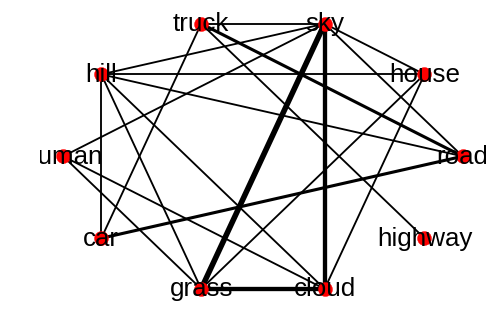

In [0]:
pos = nx.shell_layout(G);  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=200)

all_weights = []
for (node1,node2,data) in G.edges(data=True):
  all_weights.append(data['weight'])


unique_weights = list(set(all_weights))
 

for weight in unique_weights:
  weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
  width = weight*len(setOfObjectsSeen)*5.0/sum(all_weights)
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
nx.draw_networkx_labels(G, pos, font_size=26, font_family='sans-serif') 

plt.axis('off')